# 4편. 따릉이, 유저 분석해보기

따릉이를 주로 타는 사람들은 과연 누구일까??
남자일까? 여자일까?
또, 20대가 주로 탈까? 50대 이상은 잘 타지 않을까?
한편, 따릉이로 장거리 주행하는 사람들은 대체 누굴까??

이번 글에서는, 이러한 호기심을 바탕으로, 따릉이 이용자에 대한 분석을 해본다.
데이터는 **2017년 1월 ~ 2018년 12월 따릉이 데이터**를 사용한다.

## 데이터 로드

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

이번엔, 미리 picklized 되어있는 데이터를 사용한다.  
아래 `2017-2018.pkl` 가 없을 시, 아래 내용을 따라서 만들면 된다.

In [2]:
df = pd.read_pickle('data/dataframes/2017-2018.pkl')

---

### 2017-2018 데이터 프레임 만들기. (2017-2018.pkl)

In [2]:
import os

dirs = os.getcwd() + '/data/' + '서울시 공공자전거 이용현황(시간별)/'
files = os.listdir(dirs)
files

['.ipynb_checkpoints',
 '서울특별시 공공자전거 시간대별 대여정보_201801_02.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201803_04.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201805.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201806.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201807.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201808.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201809.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201810.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201811.xlsx',
 '서울특별시 공공자전거 이용정보(시간대별)_2017년_1.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_2017년_2.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_2017년_3.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_2017년_4.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_2017년_5.csv',
 '서울특별시 공공자전거 이용정보(

2018년 데이터는 이전에 picklized 해놓은게 있으므로, 2017년만 뽑아와서 picklize 하자.

In [3]:
files = [file for file in files if '2017' in file]
files

['서울특별시 공공자전거 이용정보(시간대별)_2017년_1.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_2017년_2.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_2017년_3.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_2017년_4.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_2017년_5.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_2017년_6.csv']

In [4]:
try:
    df = pd.read_pickle('data/dataframes/2017.pkl')
except:
    df = pd.DataFrame()
    
    column_types = {
        '대여시간': 'int32',
        '대여소번호': 'category',
        '대여소명': 'category',
        '대여구분코드': 'category',
        '성별': 'category',
        '연령대코드': 'category',
        '이용건수': 'int32',
        '운동량': 'float32',
        '탄소량': 'float32',
        '이동거리(M)': 'int32',
        '이동시간(분)': 'int32',
    }

    total = len(files)
    for i, file in enumerate(files, 1):
        print("%d/%d loaded..." %(i, total))

        formatter = file.split('.')[1]
        if formatter == 'xlsx':
            _df = pd.read_excel(dirs + file,
                                dtype = column_types,
                                parse_dates = ['대여일자'])
        elif formatter == 'csv':
            _df = pd.read_csv(dirs + file,
                         dtype = column_types,
                         parse_dates = ['대여일자'],
                         encoding='utf-8',
                        )
        df = pd.concat([df, _df], ignore_index=True)
    
    df['대여소번호'] = df['대여소번호'].astype('category')
    df['대여소'] = df['대여소'].astype('category')
    df['대여구분코드'] = df['대여구분코드'].astype('category')
    
    df.to_pickle('data/dataframes/2017.pkl')

In [5]:
df.head()

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2017-01-01,0,230,영등포구청역 1번출구,정기,F,~10대,1,31.270000,0.39,1680,155
1,2017-01-01,0,315,신한은행 안국역지점 옆,정기,F,20대,1,47.320000,0.55,2390,15
2,2017-01-01,0,328,탑골공원 앞,정기,F,20대,1,57.919998,0.52,2250,13
3,2017-01-01,0,175,홍연2교옆,정기,F,20대,1,133.289993,1.53,6600,43
4,2017-01-01,0,817,삼각지역 4번출구 앞,정기,F,20대,1,33.880001,0.32,1380,8


2018년과 데이터를 합치자.  
이 때, 2017년과 2018년의 열 명이 조금 다른게 있는데, 이를 미리 맞춰주고 합쳐야 한다.

In [6]:
df_2018 = pd.read_pickle('data/dataframes/2018.pkl')

rename_cols = {x: y for x, y in zip(df_2018.columns, df.columns)}
rename_cols                        

{'대여일자': '대여일자',
 '대여시간': '대여시간',
 '대여소번호': '대여소번호',
 '대여소명': '대여소',
 '대여구분코드': '대여구분코드',
 '성별': '성별',
 '연령대코드': '연령대코드',
 '이용건수': '이용건수',
 '운동량': '운동량',
 '탄소량': '탄소량',
 '이동거리': '이동거리(M)',
 '이동시간': '이동시간(분)'}

In [7]:
df_2018.rename(columns=rename_cols, inplace=True)
df = pd.concat([df, df_2018], ignore_index=True)

In [8]:
df['대여소번호'] = df['대여소번호'].astype('category')
df['대여소'] = df['대여소'].astype('category')
df['대여구분코드'] = df['대여구분코드'].astype('category')
df['대여소번호'] = df['대여소번호'].astype('category')

In [9]:
df['년'] = df['대여일자'].dt.year
df['월'] = df['대여일자'].dt.month
df['일'] = df['대여일자'].dt.day
df['요일'] = df['대여일자'].dt.dayofweek

In [10]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10183216 entries, 0 to 10183215
Data columns (total 16 columns):
대여일자       datetime64[ns]
대여시간       int32
대여소번호      category
대여소        category
대여구분코드     category
성별         category
연령대코드      category
이용건수       int32
운동량        float32
탄소량        float32
이동거리(M)    int32
이동시간(분)    int32
년          int64
월          int64
일          int64
요일         int64
dtypes: category(5), datetime64[ns](1), float32(2), int32(4), int64(4)
memory usage: 689.9 MB


일부 피처들이 제대로된 값을 가지고 있는지 확인해보자.

In [11]:
df_2018['대여구분코드'].value_counts()

정기권         4921844
일일권         1036795
단체권           27427
일일권(비회원)        918
Name: 대여구분코드, dtype: int64

In [12]:
df['대여구분코드'].value_counts()

정기권         4921844
정기          3019789
일일권         1036795
일일(회원)       809523
일일(비회원)      188696
정기(2시간권)      97170
일일(2시간권)      59953
단체권           27427
단체            21101
일일권(비회원)        918
Name: 대여구분코드, dtype: int64

값이 제대로 통일이 안되있는 것을 볼 수 있다....... 맞춰주자.

In [13]:
df['대여구분코드'].replace({
    "정기": "정기권",
    "일일(회원)": "일일권",
    "일일(비회원)": "일일권(비회원)",
    "단체": "단체권"
}, inplace=True)

In [14]:
df['대여구분코드'].value_counts()

정기권         7941633
일일권         1846318
일일권(비회원)     189614
정기(2시간권)      97170
일일(2시간권)      59953
단체권           48528
Name: 대여구분코드, dtype: int64

결측치도 보자.

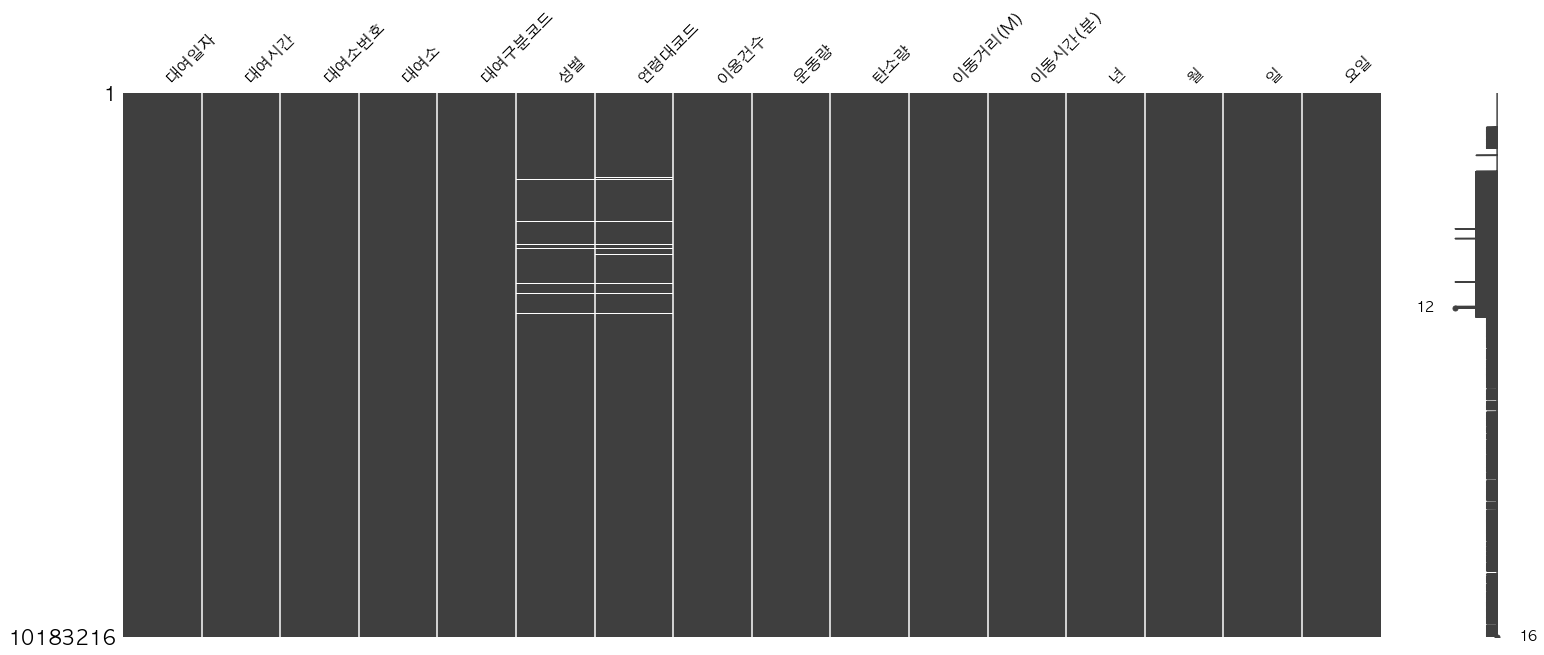

In [15]:
import missingno as msno

msno.matrix(df)

정확하지 않은 데이터는, 드랍시키자.

In [16]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(10183216, 16)
(10047162, 16)


한편, 현재 데이터프레임에는 지역구에 대한 열이 따로 없는데, 이를 대여소정보 데이터로 만들어주자.  
대여소별 지역구에 대한 정보는 미리 피클라이즈 해놓았다. 이를 활용하자. (이에 대한 자세한 과정은 `데이터에_없는_따릉이_대여소의_지역구_데이터_얻기.ipynb` 참고)


In [22]:
import pickle

with open('data/rental_region.pkl', 'rb') as f:
    rental_region_dict = pickle.load(f)
rental_region = pd.DataFrame(rental_region_dict.items())
rental_region.columns = ['대여소', '지역구']
rental_region.head()

,대여소,지역구
0,현대고등학교 건너편,강남구
1,교보타워 버스정류장(신논현역 3번출구 후면),강남구
2,논현역 7번출구,강남구
3,신영 ROYAL PALACE 앞,강남구
4,MCM 본사 직영점 앞,강남구


In [23]:
df = pd.merge(df, rental_region, on='대여소')
print(df.shape)
df.head()

(10047161, 17)


,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),년,월,일,요일,지역구
0,2017-01-01,0,230,영등포구청역 1번출구,정기권,F,~10대,1,31.270000,0.39,1680,155,2017,1,1,6,영등포구
1,2017-01-01,0,230,영등포구청역 1번출구,정기권,M,20대,1,26.930000,0.20,850,3,2017,1,1,6,영등포구
2,2017-01-01,14,230,영등포구청역 1번출구,정기권,F,20대,1,22.820000,0.20,860,7,2017,1,1,6,영등포구
3,2017-01-01,14,230,영등포구청역 1번출구,정기권,M,30대,1,32.779999,0.22,930,4,2017,1,1,6,영등포구
4,2017-01-01,18,230,영등포구청역 1번출구,정기권,F,30대,1,20.400000,0.21,920,6,2017,1,1,6,영등포구


마지막으로, 데이터 타입 바꿔주자.

In [5]:
df['대여구분코드'] = df['대여구분코드'].astype('category')
df['대여소'] = df['대여소'].astype('category')
df['지역구'] = df['지역구'].astype('category')

In [7]:
df.to_pickle('data/dataframes/2017-2018.pkl')

---

In [3]:
df.shape

(10047161, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10047161 entries, 0 to 10047160
Data columns (total 17 columns):
대여일자       datetime64[ns]
대여시간       int32
대여소번호      category
대여소        category
대여구분코드     category
성별         category
연령대코드      category
이용건수       int32
운동량        float32
탄소량        float32
이동거리(M)    int32
이동시간(분)    int32
년          int64
월          int64
일          int64
요일         int64
지역구        category
dtypes: category(6), datetime64[ns](1), float32(2), int32(4), int64(4)
memory usage: 766.6 MB


In [5]:
df.head()

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),년,월,일,요일,지역구
0,2017-01-01,0,230,영등포구청역 1번출구,정기권,F,~10대,1,31.270000,0.39,1680,155,2017,1,1,6,영등포구
1,2017-01-01,0,230,영등포구청역 1번출구,정기권,M,20대,1,26.930000,0.20,850,3,2017,1,1,6,영등포구
2,2017-01-01,14,230,영등포구청역 1번출구,정기권,F,20대,1,22.820000,0.20,860,7,2017,1,1,6,영등포구
3,2017-01-01,14,230,영등포구청역 1번출구,정기권,M,30대,1,32.779999,0.22,930,4,2017,1,1,6,영등포구
4,2017-01-01,18,230,영등포구청역 1번출구,정기권,F,30대,1,20.400000,0.21,920,6,2017,1,1,6,영등포구


In [6]:
df.tail()

,대여일자,대여시간,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),년,월,일,요일,지역구
10047156,2018-11-30,22,438,성산2-1 공영주차장,정기권,M,30대,1,34.060001,0.20,860,4,2018,11,30,4,마포구
10047157,2018-11-30,8,3106,홍남교 두바퀴쉼터,정기권,M,40대,1,21.620001,0.19,840,3,2018,11,30,4,서대문구
10047158,2018-11-30,14,3106,홍남교 두바퀴쉼터,정기권,F,20대,1,35.779999,0.32,1390,6,2018,11,30,4,서대문구
10047159,2018-11-30,14,3106,홍남교 두바퀴쉼터,정기권,M,50대,1,454.980011,4.85,20890,96,2018,11,30,4,서대문구
10047160,2018-11-30,15,1992,구로구배드민턴실내체육관 앞,정기권,M,40대,1,0.000000,0.00,0,2,2018,11,30,4,구로구


## 1. 성별로 나누어 살펴보기

### 1.1. 남자와 여자, 둘 중에 누가 더 많이 사용할까?

2년 동안의 남녀 이용량과 이용비율을 시각화 해서 보자.

In [7]:
sex_colors = ['crimson', 'royalblue']
sex_colors_r = list(reversed(sex_colors))

성별
F    4498427
M    7462140
Name: 이용건수, dtype: int32


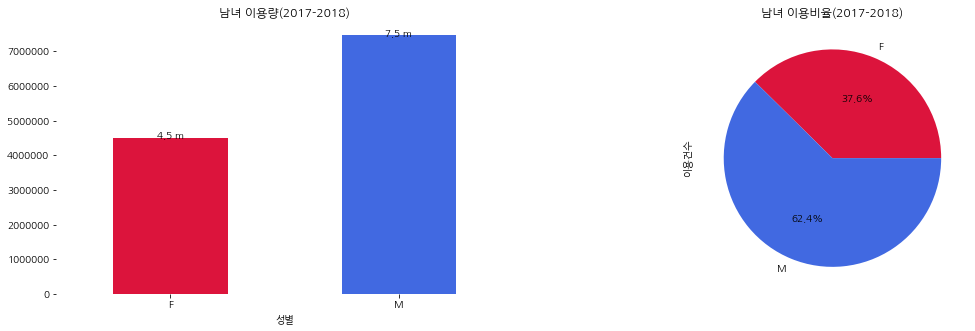

In [9]:
use_per_sex = df.groupby('성별')['이용건수'].sum()
print(use_per_sex)

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
ax = use_per_sex.plot(kind='bar', title="남녀 이용량(2017-2018)", rot=0, ax=axes[0], colors=sex_colors)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f m"%(height/1e6), (left+width/2, height), ha='center')
plt.sca(ax)
plt.box(False)
ax = use_per_sex.div(use_per_sex.sum()).plot(kind='pie', title="남녀 이용비율(2017-2018)", autopct='%.1f%%', ax=axes[1], colors=sex_colors)
plt.sca(ax)
plt.box(False)
plt.show()

In [10]:
print("남자가 여자보다 %d%%(여자 이용기준) 더 많이 이용한다." %((use_per_sex[1] - use_per_sex[0]) / use_per_sex[0] * 100))

남자가 여자보다 65%(여자 이용기준) 더 많이 이용한다.


너무나 직관적으로 다음과 같이 말할 수 있다.

> 남자가 더 많이 사용했고, 남성 이용자가 전체의 62.4% 다.

한편, 덧붙이면, 남자가 여자보다 65%(여자 이용기준) 더 많이 이용한다.

### 1.2. 년, 월별로 이용자의 남녀 비율 변화가 있었을까?

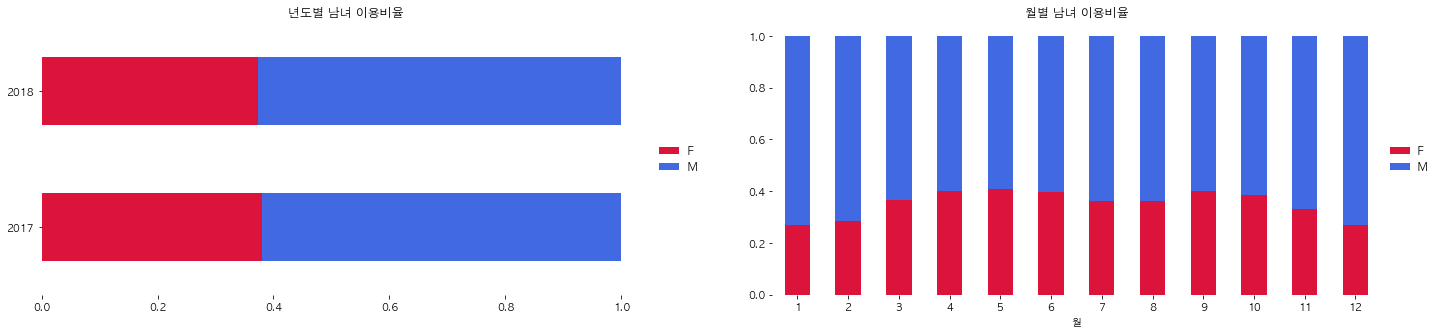

In [400]:
use_per_year_sex = df.pivot_table(index='년', columns='성별', values='이용건수', aggfunc='sum')
use_per_year_sex = use_per_year_sex.div(use_per_year_sex.sum(axis=1), axis=0)
                                        
use_per_month_sex = df.pivot_table(index='월', columns='성별', values='이용건수', aggfunc='sum')
use_per_month_sex = use_per_month_sex.div(use_per_month_sex.sum(axis=1), axis=0)

fig, axes = plt.subplots(1, 2, figsize=(24, 5))                     
ax = use_per_year_sex.plot(kind='barh', stacked=True, title="년도별 남녀 이용비율", rot=0, ax=axes[0], colors=sex_colors)

plt.sca(ax)
plt.ylabel("")
plt.box(False)
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

ax =  use_per_month_sex.plot(kind='bar', stacked=True, title="월별 남녀 이용비율", rot=0, ax=axes[1], colors=sex_colors)
plt.sca(ax)
plt.box(False)
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

이 역시 다음과 같이 쉽게 말할 수 있을 듯 하다.

> 년으로 봤을때는 비율 변화가 없다.  
> 월로 봤을 때는 타기좋은 날씨(여름 전, 후)에  
> 여성비율이 최악일 때보다 약 10% 정도 증가한다.

#### 1.3) 17년->18년, 증가폭이 더 큰 성별은?

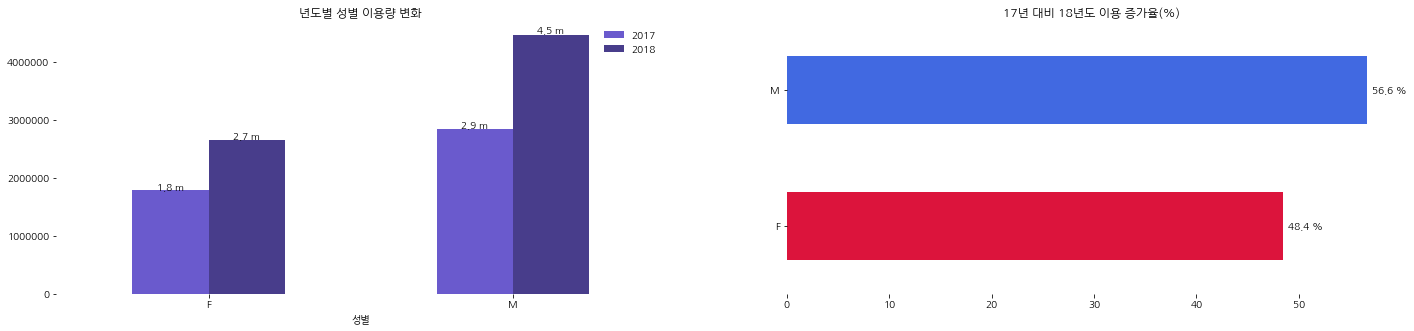

In [14]:
df_pivot = df[~((df['년'] == 2017) & (df['월'] == 12))]
df_pivot = df_pivot.pivot_table(index=['성별'], columns='년', values='이용건수', aggfunc='sum')
#df_pivot = df_pivot.reindex(age_order)


df_pivot_ratio = (df_pivot[2018] - df_pivot[2017]) / df_pivot[2017] * 100
df_pivot_ratio.sort_values(inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(24, 5))                     
ax = df_pivot.plot(kind='bar', title="년도별 성별 이용량 변화", rot=0, ax=axes[0], colors=['slateblue', 'darkslateblue'])
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f m"%(height/1e6), (left+width/2, height*1.01), ha='center')
plt.sca(ax)
plt.box(False)
ax.legend(frameon=False)


ax = df_pivot_ratio.plot(kind='barh', title="17년 대비 18년도 이용 증가율(%)", rot=0, ax=axes[1], colors=sex_colors)
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.1f %%"%(width), va='center')
plt.sca(ax)
plt.ylabel("")
plt.box(False)

plt.show()

> 남자 이용자가 전해대비 56.6%로 여자 48.4% 보다 더 많이 증가했다.

### 1.4. 남녀별로, 평균 이용거리, 이용시간 차이가 있을까?

이번에는 violinplot 을 이용하여 시각화해보자.

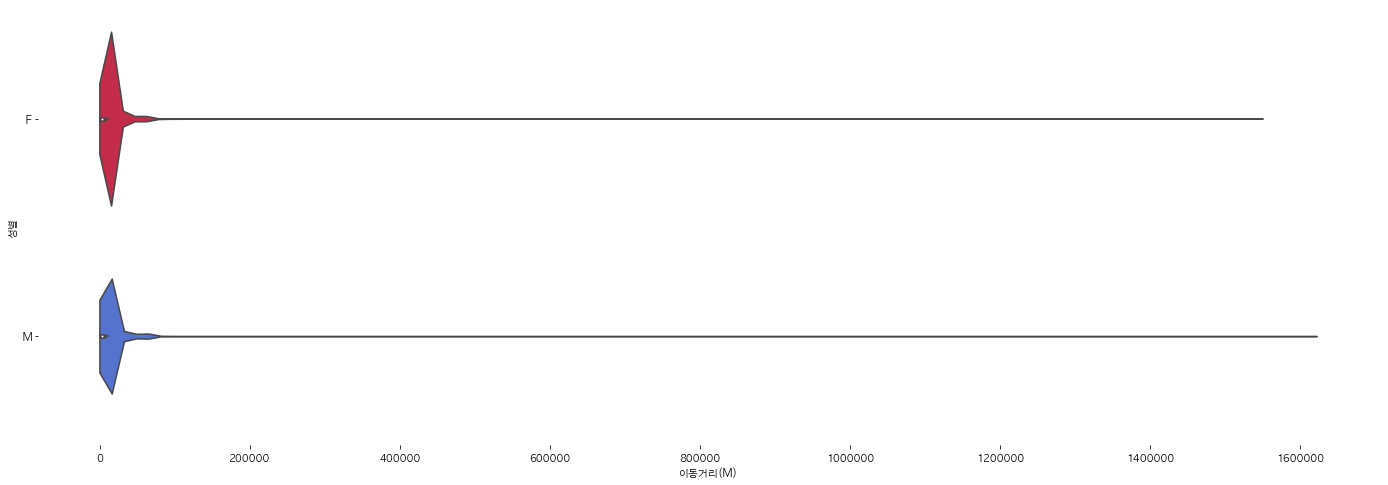

In [28]:
plt.figure(figsize=(24, 8))
sns.violinplot(x='이동거리(M)', y='성별', data=df, palette=sex_colors)
plt.box(False)
plt.show()

무턱대고 그렸더니, 이상치들까지 같이 표시된다.  
하루 동안 따릉이로 1600000m, 즉 1600키로를 갈 일은 상식적으로 불가능하므로, 극단치가 아니라 이상치라고 봐야한다.

z-score 를 이용하여 이상치 값들을 제거 한 뒤, 다시 그려보면, ( z-score 가 3 미만 )


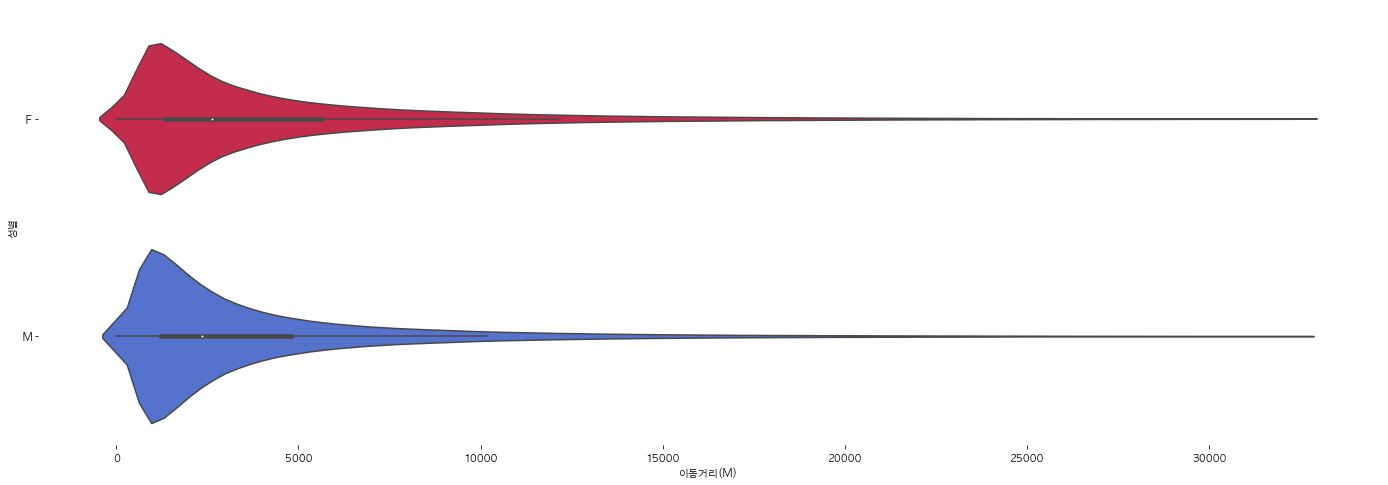

In [29]:
from scipy import stats

df_robust = df[(np.abs(stats.zscore(df['이동거리(M)'])) < 3)]
plt.figure(figsize=(24, 8))
sns.violinplot(x='이동거리(M)', y='성별', data=df_robust, split=True, palette=sex_colors)
plt.box(False)
plt.show()

In [30]:
df.groupby('성별')[['이동거리(M)', '이동시간(분)']].median()

,이동거리(M),이동시간(분)
성별,,
F,2690,22
M,2370,17


이용거리 분포. 이용시간은 이용거리와 선형관계이므로, 굳이 따로 플롯을 그리지 않았다.  
사실, 그래도 분포는 비슷하고, 실질적인 차이를 보려면 중간값을 직접 봐야할듯 하다.

중간값을 뽑아보면 다음과 같은 수치가 나온다.

> 여자 : 이용거리 2690m, 이용시간 22분  
> 남자 : 이용거리 2370m, 이용시간 17분

종합적으로 다음과 같은 결론을 낼 수 있다.

> 이용자는 남자가 더 많지만, 일반적으로 한 번 이용시간은 여자보다 짧다.


---

## 2\. 연령대로 나누어 살펴보기

위와 같은 방식으로 살펴보자.

### 2.1. 어느 연령대가 제일 많이 사용할까?

데이터에는 10 단위 기준으로 연령대를 구분해놓았는데, 이를 바로 시각화해서 보자.

In [15]:
age_order = ['~10대', '20대', '30대', '40대', '50대', '60대', '70대~']

In [16]:
def create_CN(n):
    return ["C%d"%i for i in range(n)]

연령대코드
~10대     259799
20대     5759840
30대     3134614
40대     1778325
50대      762272
60대      188166
70대~      77551
Name: 이용건수, dtype: int32


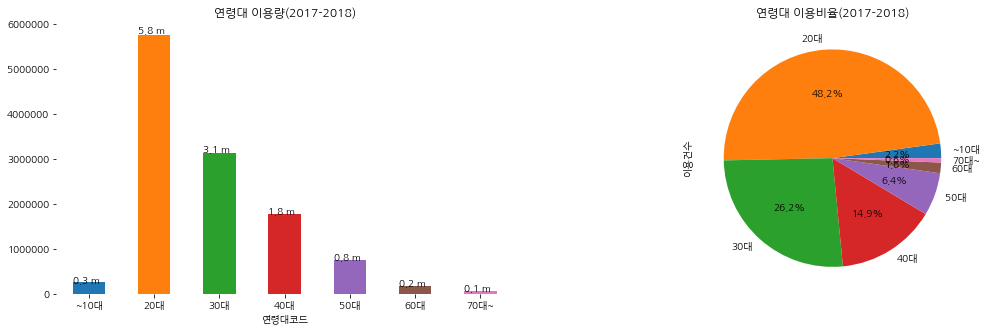

In [17]:
use_per_age = df.groupby('연령대코드')['이용건수'].sum()
use_per_age = use_per_age.reindex(age_order)
print(use_per_age)

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
ax = use_per_age.plot(kind='bar', title="연령대 이용량(2017-2018)", rot=0, ax=axes[0], colors=create_CN(len(use_per_age)))
for p in ax.patches:
    ax.annotate("%.1f m"%(p.get_height()/1e6), (p.get_x() * 1.0, p.get_height() * 1.01))
plt.sca(ax)
plt.box(False)
ax = use_per_age.div(use_per_age.sum()).plot(kind='pie', title="연령대 이용비율(2017-2018)", autopct='%.1f%%', ax=axes[1])
plt.show()

> 20대 > 30대 > 40대 > 50대 순으로 이용자가 많다.  
> 20대 이용자는 전체의 48.2%로, 이용 비율은 50대까지 선형적으로 감소한다.

### 2.2. 년, 월별로 연령대 비율 변화가 있었을까?
연령대 역시 성별과 마찬가지로 년, 월로 변화 비율을 봐보자.

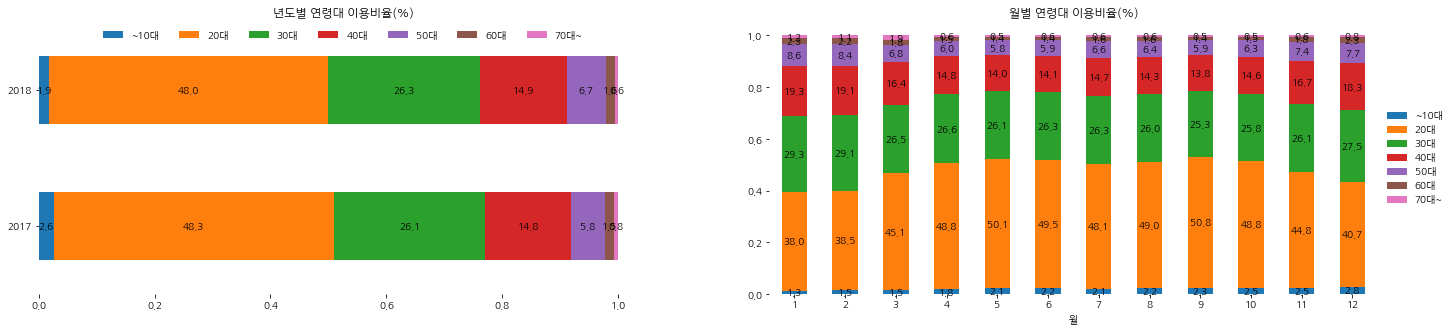

In [19]:
use_per_year_age = df.pivot_table(index='년', columns='연령대코드', values='이용건수', aggfunc='sum')
use_per_year_age = use_per_year_age.div(use_per_year_age.sum(axis=1), axis=0)
use_per_year_age = use_per_year_age[age_order]
                                        
use_per_month_age = df.pivot_table(index='월', columns='연령대코드', values='이용건수', aggfunc='sum')
use_per_month_age = use_per_month_age.div(use_per_month_age.sum(axis=1), axis=0)
use_per_month_age = use_per_month_age[age_order]

fig, axes = plt.subplots(1, 2, figsize=(24, 5))                     
ax = use_per_year_age.plot(kind='barh', stacked=True, title="년도별 연령대 이용비율(%)", rot=0, ax=axes[0])
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.sca(ax)
plt.ylabel("")
plt.box(False)
ax.legend(frameon=False, loc='upper center', ncol=7)

ax = use_per_month_age.plot(kind='bar', stacked=True, title="월별 연령대 이용비율(%)", rot=0, ax=axes[1])
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.sca(ax)
plt.box(False)
ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

먼저, 왼쪽 플롯을 보면, 2017년에서 2018년으로 갈 때, 연령대 비율 변화가 거의 없었음을 알 수 있다.  
있다면, 50대가 6.7 -> 5.8% 로 줄고, 10대가 1.9 -> 2.6% 로 증가한 정도가 있겠다.

오른쪽 플롯은 월별로 연령대별 이용자 비율을 나타내는데, 각 연령대마다 월이 지남에 따라 어떤 경향성을 가지는지 알기가 힘들다.  
질문을 좀 바꿔, 어떤 연령대끼리 이용비율이 변하는데 있어 비슷한 경향을 가지는지 조사해보자.  
피어슨 상관계수를 이용하여, 클러스터 맵으로 시각화하면 쉽게 알아낼 수 있다.

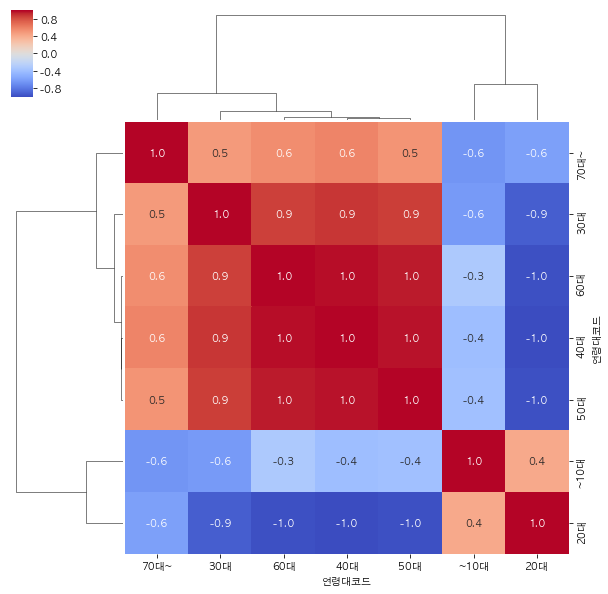

In [48]:
sns.clustermap(use_per_month_age.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.1f')
plt.show()

30, 40, 50, 60대가 월별 이용비율 변화에 비슷한 경향을 지니고 있다.  
한편, 20대와 30대는 상관계수가 0.9로, 굉장히 강한 음의 선형관계를 가지는 것도 알 수 있다.  
정리하면 다음과 같다.

> 년으로 봤을때는 비율 변화가 없다.  
> 월로 봤을 때는 30~60대가 비슷한 경향으로 변화하고,  
> 특히, 20대와 30대는 정반대 변화 경향을 갖는다.

### 2.3. 17년->18년, 어느 연령대 유저가 더 많이 증가했을까?

18년에 12월 데이터가 없기 때문에, 17년 12월 데이터만 제외시키자.

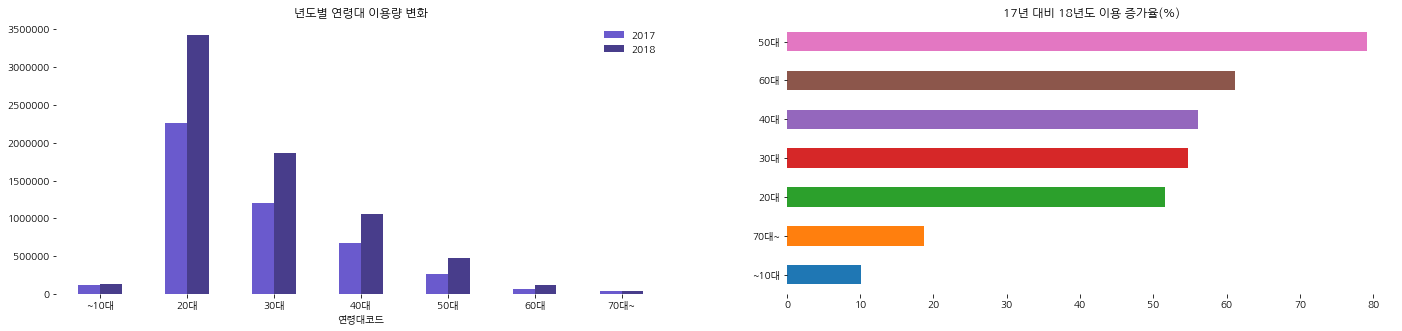

In [21]:
df_pivot = df[~((df['년'] == 2017) & (df['월'] == 12))]
df_pivot = df_pivot.pivot_table(index=['연령대코드'], columns='년', values='이용건수', aggfunc='sum')
df_pivot = df_pivot.reindex(age_order)


df_pivot_ratio = (df_pivot[2018] - df_pivot[2017]) / df_pivot[2017] * 100
df_pivot_ratio.sort_values(inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(24, 5))                     
ax = df_pivot.plot(kind='bar', title="년도별 연령대 이용량 변화", rot=0, ax=axes[0], colors=['slateblue', 'darkslateblue'])
plt.sca(ax)
plt.box(False)
ax.legend(frameon=False)

ax = df_pivot_ratio.plot(kind='barh', title="17년 대비 18년도 이용 증가율(%)", rot=0, ax=axes[1], colors=create_CN(7))
plt.sca(ax)
plt.ylabel("")
plt.box(False)

plt.show()

> 전반적으로 모든 연령대가 다 증가하였고,  
> 특히, 50대 유저가 전해대비 약 80% 증가로 가장 많이 증가했다.

### 2.4. 연령별로, 평균 이용거리, 이용시간 차이가 있을까?
violinplot 보다 boxplot 이 데이터를 더 잘 보여줄듯 하여, 이번에는 boxplot 으로 시각화 해본다.

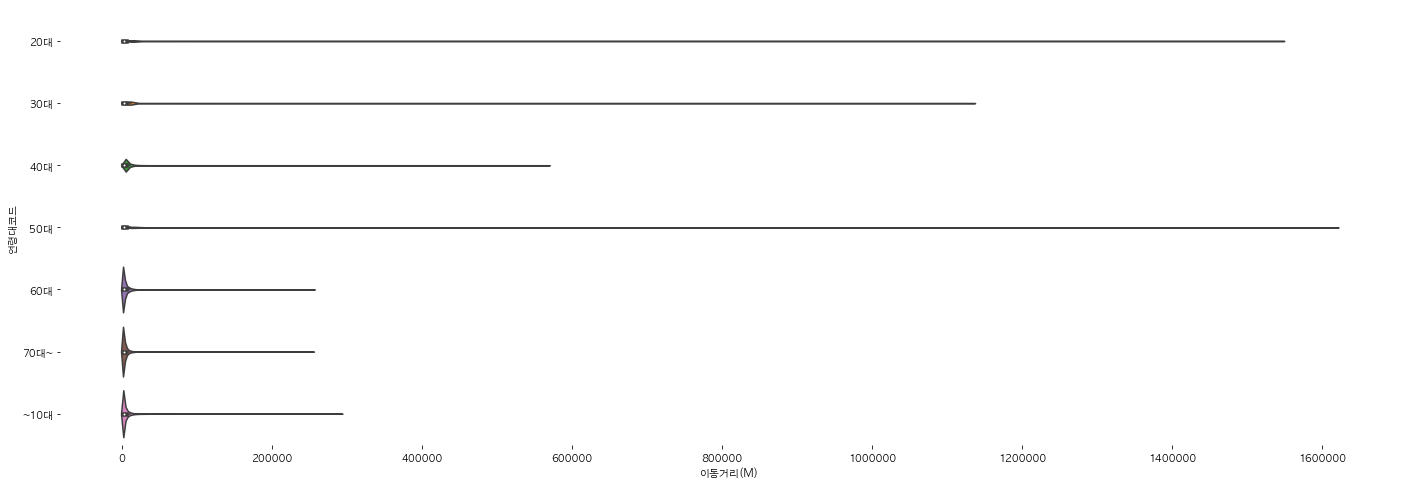

In [12]:
plt.figure(figsize=(24, 8))
sns.violinplot(x='이동거리(M)', y='연령대코드', data=df)
plt.box(False)
plt.show()

그대로 그리면, 이상치가 너무 많아서, z-score < 3 으로 몇번 거른뒤 시각화 하자.

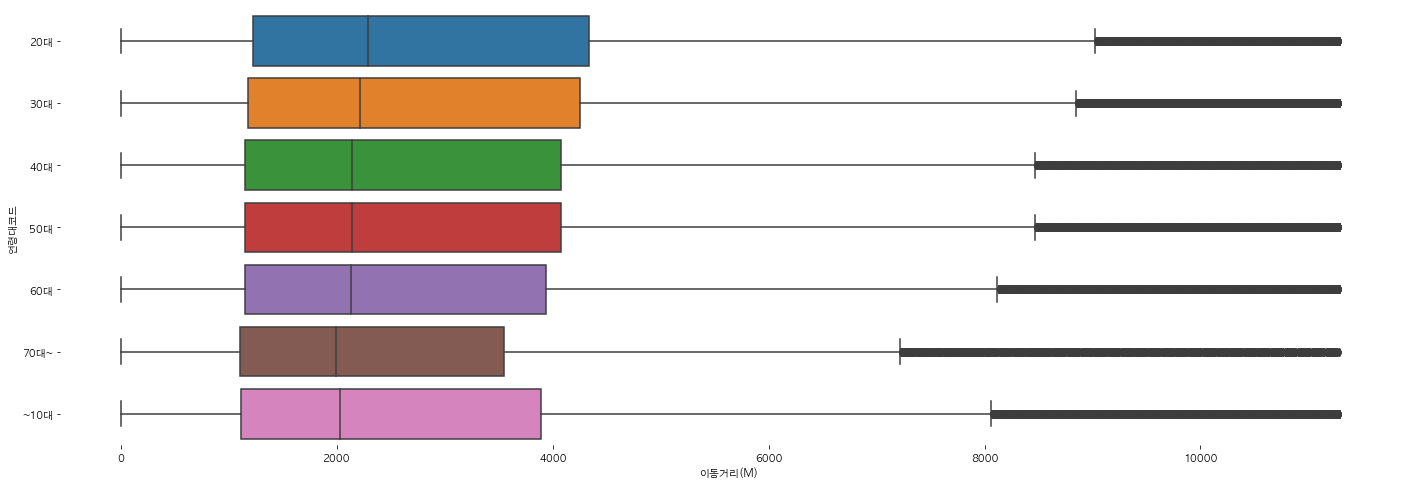

In [19]:
from scipy import stats

df_robust = df_robust[(np.abs(stats.zscore(df_robust['이동거리(M)'])) < 3)]
df_robust = df_robust[(np.abs(stats.zscore(df_robust['이동거리(M)'])) < 3)]
df_robust = df_robust[(np.abs(stats.zscore(df_robust['이동거리(M)'])) < 3)]

plt.figure(figsize=(24, 8))
sns.boxplot(x='이동거리(M)', y='연령대코드', data=df_robust)
plt.box(False)
plt.show()

뭐, 상식적이게도, 역시 젊을수록 오래 이동한다. 10대를 제외하고는 말이다.  
그래도 중간값은 생각보다 그렇게 큰 차이를 보이지는 않는다.

---

## 3\. 연령 x 성별로 좀 더 살펴보기

이번에는 각 연령대별을 이루고 있는 성별,  
혹은 각 성별 내 연령대비율에 대해서 좀 더 자세히 살펴본다.


### 3.1. 연령대 내 성별 비율

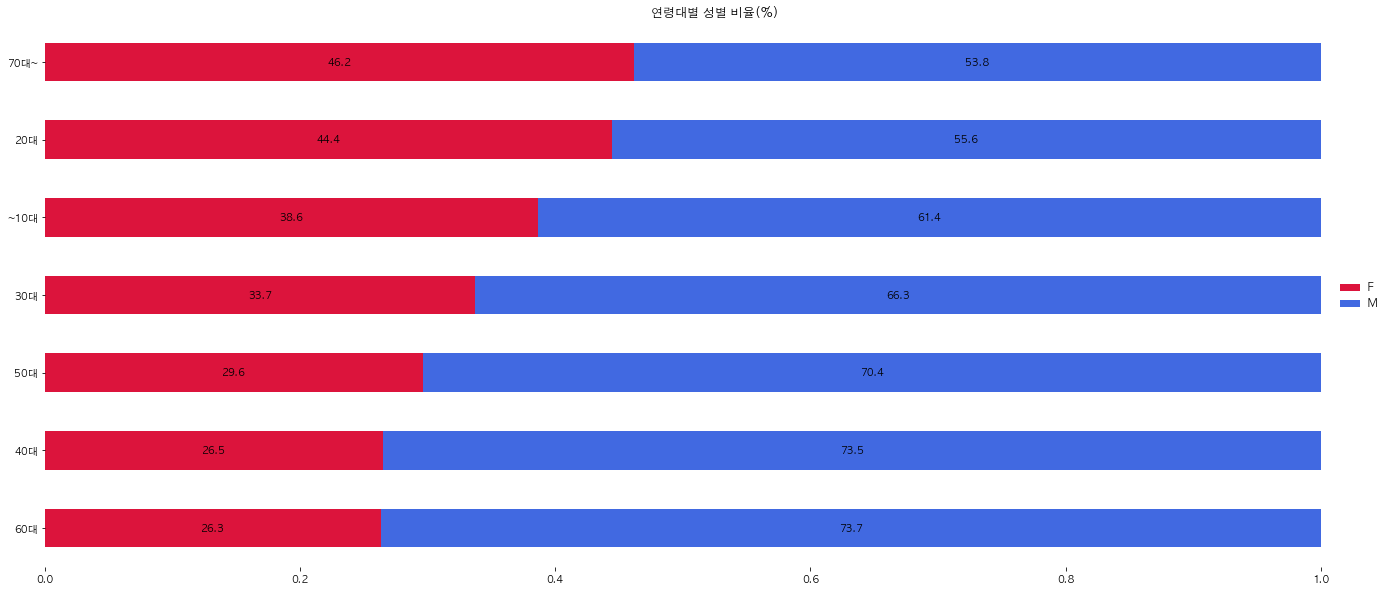

In [411]:
df_pivot = df.pivot_table(index="연령대코드", columns="성별", values="이용건수", aggfunc="sum")
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)
df_pivot = df_pivot.reindex(reversed(age_order))
df_pivot.sort_values('F', inplace=True)

ax = df_pivot.plot(kind='barh', stacked=True, figsize=(24, 10), title="연령대별 성별 비율(%)", rot=0, color=sex_colors)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(0.96, 0.5))
plt.ylabel("")
plt.show()

먼저 전반적으로 전 연령대에서 남성비율이 많기는 하지만, 여성비율이 26~46%로 차이가 난다.  
먼저 70대 이상에서, 여성 비율이 46.2%로 제일 많고,  
주 이용자였던 20대 -> 40대로 갈수록 여성비율이 감소함을 알 수 있다.

> 전 연령대에서 남성비율이 53~73%로 여성보다 많지만,  
> 주 이용자 연령인 20대는 남성이 55.6%로 여성과 10% 차이밖에 안난다.

### 3.2. 성별 내 연령대 비율

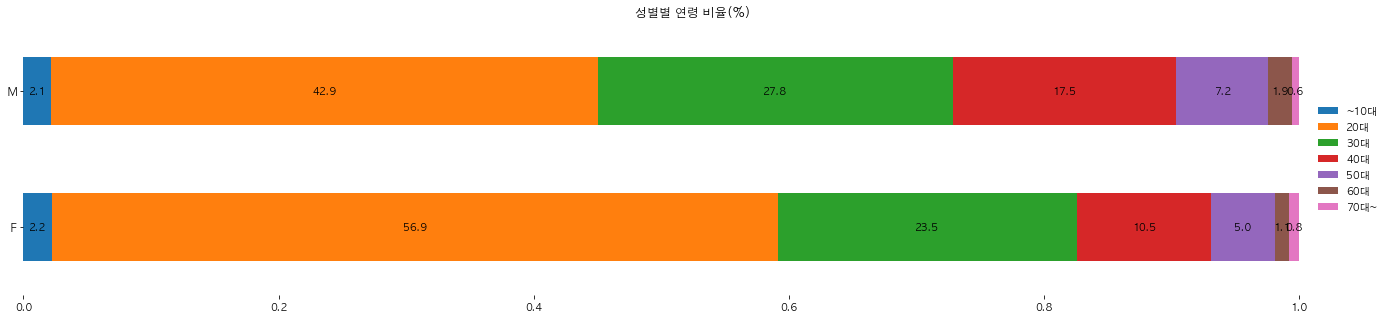

In [412]:
df_pivot = df.pivot_table(index="성별", columns="연령대코드", values="이용건수", aggfunc="sum")
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)
df_pivot = df_pivot[age_order]

ax = df_pivot.plot(kind='barh', stacked=True, figsize=(24, 5), title="성별별 연령 비율(%)", rot=0)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(0.96, 0.5))
plt.ylabel("")
plt.show()

여자의 경우 남자보다 20대 비율이 더 높음을 알 수 있다.  
반대로, 남자의 경우 20대 비율은 여자보다 적지만, 나머지 30대와 40대 비율이 조금 더 높은 것을 알 수 있다.

> 여자의 경우, 20대에 이용자 비율이 남자보다 14% 정도 더 몰려있다.

## 4\. 지역별로 나누어 살펴보기

### 4.1. 지역별로 연령이나 성별 비율이 다르진 않을까?

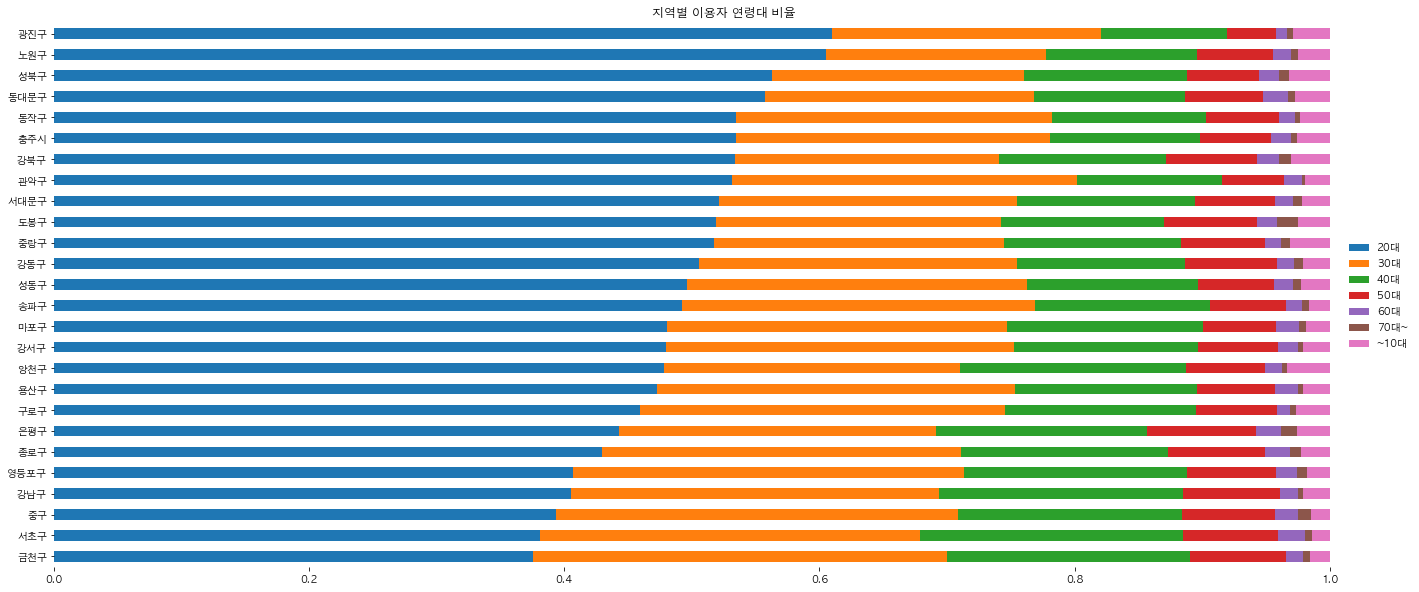

In [193]:
df_pivot = df.pivot_table(index='지역구', columns='연령대코드', values='이용건수', aggfunc='sum')
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)
df_pivot.sort_values('20대', inplace=True)

df_pivot.plot(kind='barh', stacked=True, figsize=(24, 10), title="지역별 이용자 연령대 비율", rot=0)
plt.box(False)
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(0.96, 0.5))
plt.ylabel("")
plt.show()

위 플롯이 한 눈에 들어오지 않는다면, 주 이용층인 그냥 20대만 집중해서 살펴보자.  
먼저, 광진구나 노원구의 경우, 이용자의 약 60%가 20대임을 알 수 있다.  
한편, 서초, 금천의 경우 40%가 안된다.  
20대의 비중이 크게는 지역별로 20%나 차이가 난다는 것이다.

그렇다면, 특정 지역구 내, 대여소에도 이런 차이가 있을까?  
20대의 비중이 높은 광진구 내 대여소들만 살펴보도록 하자.

In [120]:
gwangjin = df[df['지역구'] == '광진구']

df_pivot = gwangjin.pivot_table(index="대여소", columns='연령대코드', values='이용건수', aggfunc='sum', fill_value=0)
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)
print(df_pivot.shape)
df_pivot.head()

(57, 7)


연령대코드,20대,30대,40대,50대,60대,70대~,~10대
대여소,,,,,,,
강변역 4번출구 뒤,0.585551,0.204971,0.114984,0.049641,0.010844,0.002535,0.031474
건국대학교 (입학정보관),0.802253,0.105963,0.030290,0.012390,0.000772,0.000983,0.047348
건국대학교 (행정관),0.875980,0.064188,0.021202,0.012634,0.000436,0.000145,0.025414
건국대학교 과학관(이과대) 앞,0.872727,0.040119,0.021937,0.023320,0.000000,0.000000,0.041897
건국대학교 학생회관,0.860859,0.050191,0.018461,0.012849,0.000839,0.000210,0.056590


In [121]:
df_pivot.sort_values('20대', inplace=True)

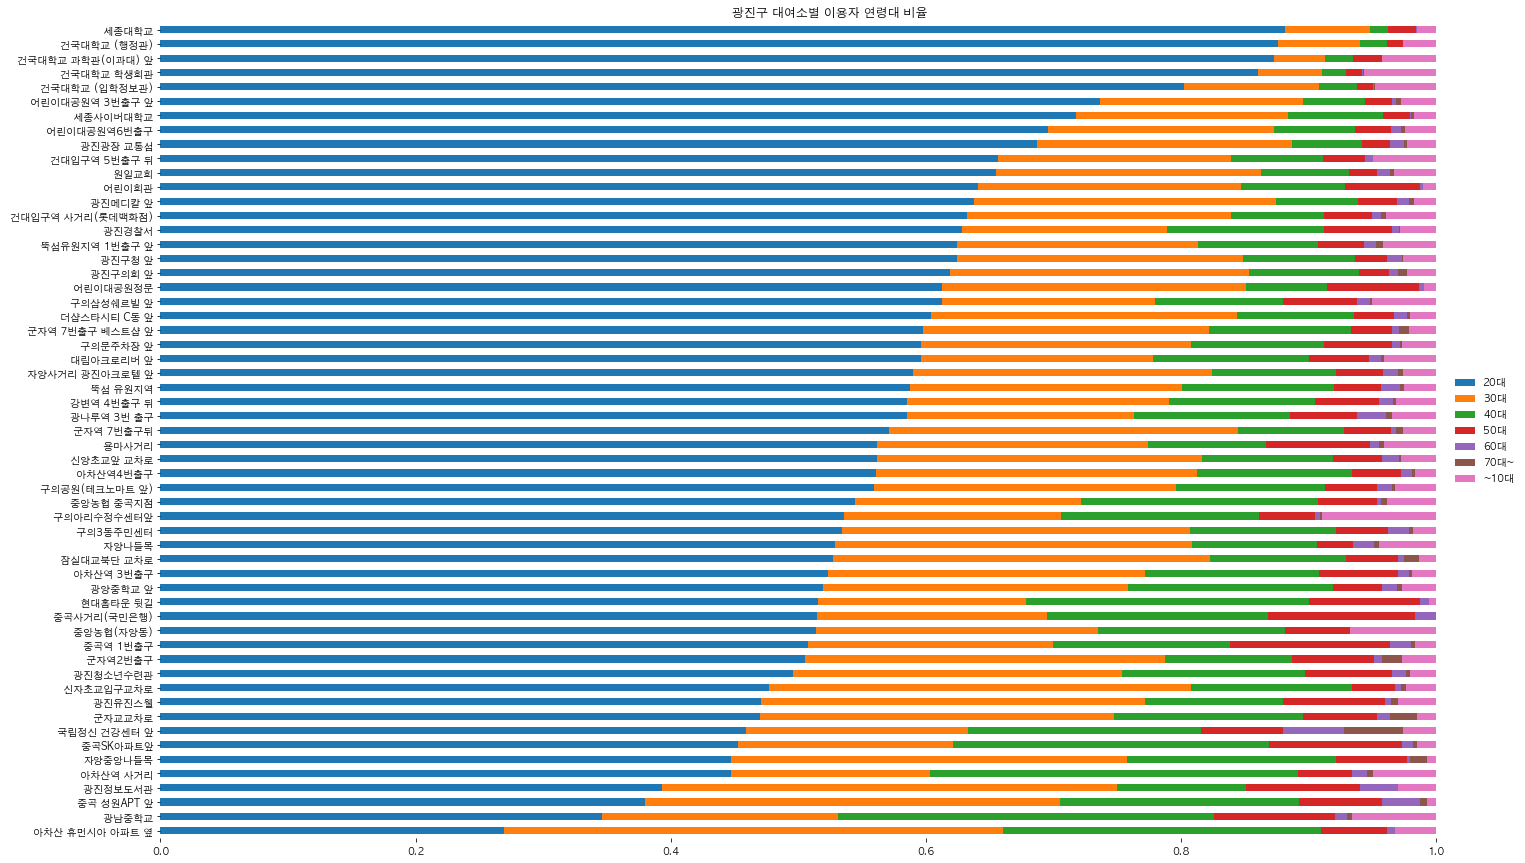

In [122]:
df_pivot.plot(kind='barh', stacked=True, figsize=(24, 15), title="광진구 대여소별 이용자 연령대 비율", rot=0)
plt.box(False)
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(0.96, 0.5))
plt.ylabel("")
plt.show()

대여소 역시, 20대 비중이 많게는 80%를 넘고, 적게는 30%도 안된다.  
20대 비중이 많은 상위 대여소들을 살펴보면, 세종대학교, 건국대학교 등.. 대부분 대학 근처 대여소들이다.  
한편, 20대 비중이 낮은 곳은, 아파트, 중학교, 도서관 등.. 상식적으로 20대의 이용비율이 낮을만한 곳들이다.

그렇다면, 이번엔 지역별로 성별 비율을 보면 어떨까?

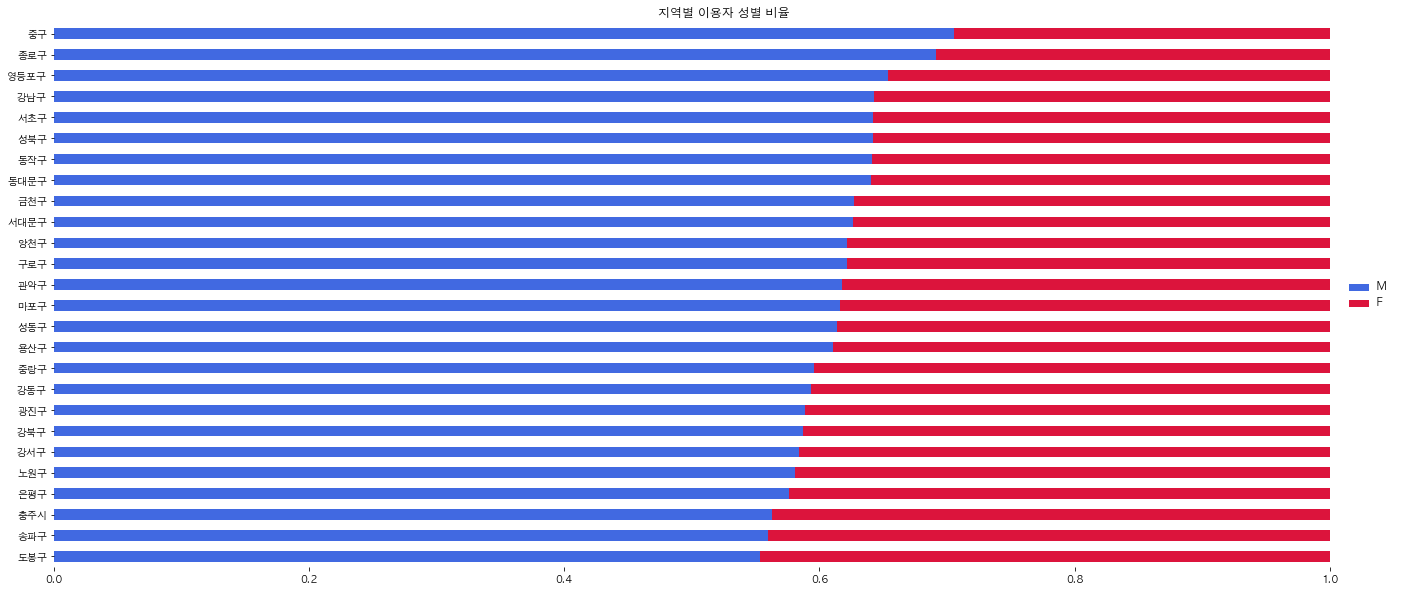

In [11]:
df_pivot = df.pivot_table(index='지역구', columns='성별', values='이용건수', aggfunc='sum')
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)
df_pivot.sort_values('M', inplace=True)
df_pivot = df_pivot[['M', 'F']]

df_pivot.plot(kind='barh', stacked=True, figsize=(24, 10), title="지역별 이용자 성별 비율", rot=0, colors=sex_colors_r)
plt.box(False)
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(0.96, 0.5))
plt.ylabel("")
plt.show()

뭐 역시나, 전 지역에서 남성 이용자가 더 많은 패턴은 동일하다.  
지역별 남녀 차이도 10% 내외로 그렇게 두드러지지 않는다.

정리하면,

> 지역별, 그리고 지역 내 대여소마다 이용자의 연령비율은 확연히 다르다.  
> 성별비율은 그다지 유의미하게 다르지 않다.


## 5\. 다루지 않은 내용들

사실 데이터를 열어보면, 더 확인하고 싶었고, 확인할 수 있는 내용들이 꽤 있었다.  
예를 들어, 장거리 주행자는 누구일까? 라든가, 따릉이 속력 분포는 어떻게 되어있을까? 등 이라든지...

하지만 여기서 다루지 않는 이유는,

1.  장거리 주행자들? 위에서 살펴본 연령x성별 분포와 유사하다. 따로 살펴보는게 별 의미가 없을 듯 싶어서.
2.  이용거리와 이용시간에 이상값들이 너무 많다. 예를 들어, 이용시간이 0이라든가, 이용거리가 300000이라든가..  
    문제는, 이상치인지, 정상적인 범주에서의 극단값인지 명확하지가 않다.  
    따라서, 구태여 위험을 무릎쓴 해석은 다른 분께 넘겨본다.이상치 많아서 의미없음.